<a href="https://colab.research.google.com/github/henrygas/tensorflow_2_learn/blob/master/tensorflow_homework_senior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
%matplotlib inline

tf.logging.set_verbosity(tf.logging.INFO)
print(tf.__version__)
print(np.__version__)

1.15.0-rc3
1.16.5


In [2]:
mnist = input_data.read_data_sets("./")

print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)

print(mnist.test.images.shape)
print(mnist.test.labels.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


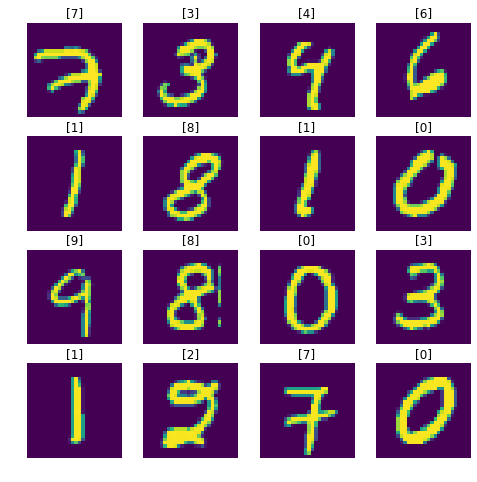

In [3]:
plt.figure(figsize=(8, 8))

for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.axis("off")
  plt.title("[{}]".format(mnist.train.labels[i]))
  plt.imshow(mnist.train.images[i].reshape((28, 28)))

after 101 training steps, the loss is:0.24815191328525543, validation_accuracy is:0.8948000073432922
after 201 training steps, the loss is:0.14328226447105408, validation_accuracy is:0.9161999821662903
after 301 training steps, the loss is:0.4998488128185272, validation_accuracy is:0.9186000227928162
after 401 training steps, the loss is:0.4671897888183594, validation_accuracy is:0.9088000059127808
after 501 training steps, the loss is:0.10365037620067596, validation_accuracy is:0.9440000057220459
after 601 training steps, the loss is:0.48984667658805847, validation_accuracy is:0.9422000050544739
after 701 training steps, the loss is:0.7058823108673096, validation_accuracy is:0.8870000243186951
after 801 training steps, the loss is:0.15038448572158813, validation_accuracy is:0.9567999839782715
after 901 training steps, the loss is:0.13812261819839478, validation_accuracy is:0.9472000002861023
The training has finished!
The train accuracy is: 0.9488000273704529
The validation accuracy i

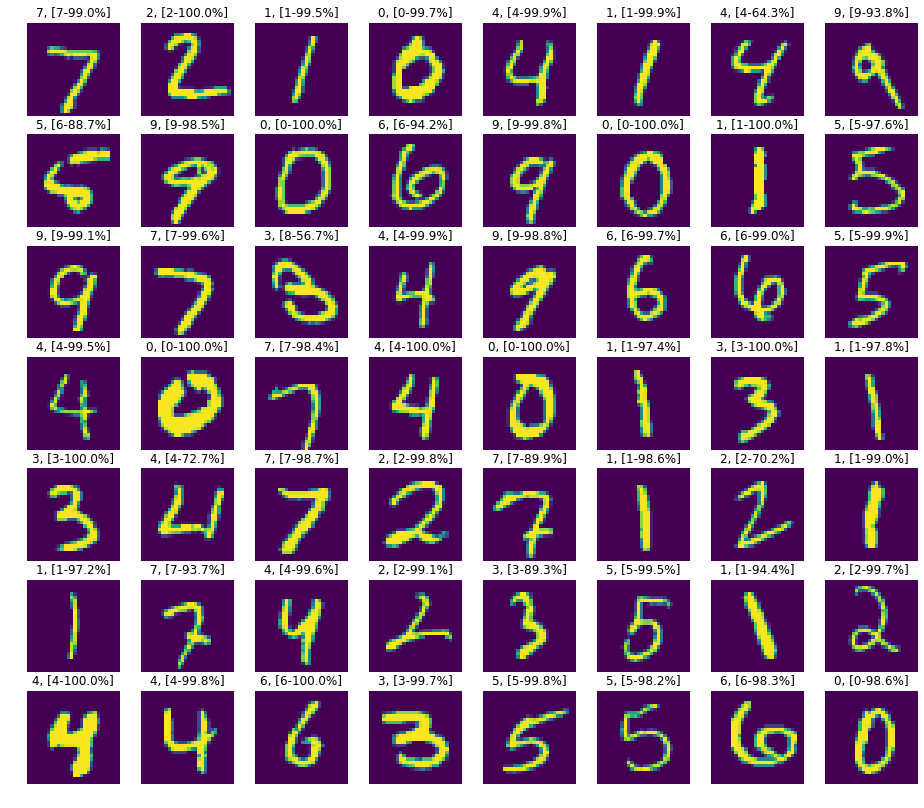

In [7]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("int64", [None])
learning_rate = tf.placeholder("float")

def initialize(shape, stddev=0.1):
  return tf.truncated_normal(shape, stddev=stddev)

L1_units_count = 100
W_1 = tf.Variable(initialize([784, L1_units_count]))
b_1 = tf.Variable(initialize([L1_units_count]))
logits_1 = tf.matmul(x, W_1) + b_1
output_1 = tf.nn.relu(logits_1)

L2_units_count = 100
W_2 = tf.Variable(initialize([L1_units_count, L2_units_count]))
b_2 = tf.Variable(initialize([L2_units_count]))
logits_2 = tf.matmul(output_1, W_2) + b_2
output_2 = tf.nn.relu(logits_2)

L3_units_count = 10
W_3 = tf.Variable(initialize([L2_units_count, L3_units_count]))
b_3 = tf.Variable(initialize([L3_units_count]))
logits_3 = tf.matmul(output_2, W_3) + b_3

logits = logits_3

cross_entropy_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy_loss)

pred = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(pred, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

batch_size = 32
max_train_step = 1000
learning_rate_value = 0.3

saver = tf.train.Saver()
with tf.Session() as ses:
  ses.run(tf.global_variables_initializer())

  validation_data = {
      x: mnist.validation.images,
      y: mnist.validation.labels,
  }

  test_data = {
      x: mnist.test.images,
      y: mnist.test.labels
  }

  for i in range(max_train_step):
    xs, ys = mnist.train.next_batch(batch_size)
    _, loss = ses.run(
        [optimizer, cross_entropy_loss],
        feed_dict={
            x: xs,
            y: ys,
            learning_rate: learning_rate_value
        })
    
    if i > 0 and i % 100 == 0:
      validation_accuracy = ses.run(accuracy, feed_dict=validation_data)
      print("after {} training steps, the loss is:{}, validation_accuracy is:{}".format(
          i + 1, loss, validation_accuracy))
      
      saver.save(ses, "./model.ckpt", global_step=i)

  print("The training has finished!")
  acc_train = ses.run(accuracy, feed_dict={
      x: mnist.train.images,
      y: mnist.train.labels
  })
  print("The train accuracy is: {}".format(acc_train))
  acc_validation = ses.run(accuracy, feed_dict=validation_data)
  print("The validation accuracy is: {}".format(acc_validation))
  acc_test = ses.run(accuracy, feed_dict=test_data)
  print("The test accuracy is: {}".format(acc_test))

rows = 7
cols = 8
with tf.Session() as ses:
  ckpt = tf.train.get_checkpoint_state("./")
  if ckpt and ckpt.model_checkpoint_path:
    saver.restore(ses, ckpt.model_checkpoint_path)

    show_size = rows * cols

    final_pred, acc = ses.run(
        [pred, accuracy],
        feed_dict={
            x: mnist.test.images[:show_size],
            y: mnist.test.labels[:show_size]
        })
    
    print(acc)

    orders = np.argsort(final_pred)

    plt.figure(figsize=(2*cols, 2*rows))
    for idx in range(show_size):
      order = orders[idx, :][-1]
      prob = final_pred[idx, :][order]

      plt.subplot(rows, cols, idx + 1)
      plt.axis("off")
      plt.title("{}, [{}-{:.1f}%]".format(mnist.test.labels[idx], order, prob * 100))
      plt.imshow(mnist.test.images[idx].reshape((28, 28)))